# Week 1: Exploratory data anaylsis

In [4]:
#import packages
import sys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
import os
import warnings
warnings.filterwarnings("ignore")

In [5]:
# import and read the dataset
path = kagglehub.dataset_download("adilshamim8/cost-of-international-education")
print(os.listdir(path))
data = pd.read_csv(os.path.join(path, "International_Education_Costs.csv"))
pd.set_option("max_info_columns", 100)

['International_Education_Costs.csv']


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB


In [7]:
data.describe()

Duration_Years   Tuition_USD  Living_Cost_Index     Rent_USD  \
count      907.000000    907.000000         907.000000   907.000000   
mean         2.836825  16705.016538          64.437486   969.206174   
std          0.945449  16582.385275          14.056333   517.154752   
min          1.000000      0.000000          27.800000   150.000000   
25%          2.000000   2850.000000          56.300000   545.000000   
50%          3.000000   7500.000000          67.500000   900.000000   
75%          4.000000  31100.000000          72.200000  1300.000000   
max          5.000000  62000.000000         122.400000  2500.000000   

       Visa_Fee_USD  Insurance_USD  Exchange_Rate  
count    907.000000     907.000000     907.000000  
mean     211.396913     700.077178     623.000695  
std      143.435740     320.374875    3801.746134  
min       40.000000     200.000000       0.150000  
25%      100.000000     450.000000       0.920000  
50%      160.000000     650.000000       1.350000  
75%      240.000000     800.000000       7.150000  
max      490.000000    1500.000000   42150.000000

In [8]:
data.head()

Country       City                      University  \
0        USA  Cambridge              Harvard University   
1         UK     London         Imperial College London   
2     Canada    Toronto           University of Toronto   
3  Australia  Melbourne         University of Melbourne   
4    Germany     Munich  Technical University of Munich   

                  Program   Level  Duration_Years  Tuition_USD  \
0        Computer Science  Master             2.0        55400   
1            Data Science  Master             1.0        41200   
2      Business Analytics  Master             2.0        38500   
3             Engineering  Master             2.0        42000   
4  Mechanical Engineering  Master             2.0          500   

   Living_Cost_Index  Rent_USD  Visa_Fee_USD  Insurance_USD  Exchange_Rate  
0               83.5      2200           160           1500           1.00  
1               75.8      1800           485            800           0.79  
2               72.5      1600           235            900           1.35  
3               71.2      1400           450            650           1.52  
4               70.5      1100            75            550           0.92

#### Handling missing values and duplicates

In [10]:
#handling missing values
print("\nHandling missing values\n{}".format("-" * 35))
for i in data.columns: 
    if data[i].isna().sum() !=0:
        print("null values in ", i, "column:", data[i].isna().sum())
    else: 
        print("There is no missing values in the columns")

# handle duplicates 
print("\nHandling duplicate values\n{}".format("-" * 35))

if data.duplicated().sum():
    print(f"Number of duplicated rows: {data.duplicated().sum()}")
    data.drop_duplicates(inplace=True)
else: 
    print("No duplicates")


Handling missing values
-----------------------------------
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns
There is no missing values in the columns

Handling duplicate values
-----------------------------------
No duplicates


# EDA

- Profile cost distributions by Country, City, Level, and Program.
- Visualize correlations among Tuition_USD, Living_Cost_Index, Rent_USD, and Exchange_Rate.
- Compute baseline Total Cost of Attendance (tuition + rent × months + visa + insurance × years).
- Detect outliers and assess currency-conversion stability.



Profile cost distributions by Country, City, Level, and Program.

In [14]:
data.columns

Index(['Country', 'City', 'University', 'Program', 'Level', 'Duration_Years',
       'Tuition_USD', 'Living_Cost_Index', 'Rent_USD', 'Visa_Fee_USD',
       'Insurance_USD', 'Exchange_Rate'],
      dtype='object')

In [15]:
# group data by country, city, Level, and Program
grouped = data.groupby(["Country", "City", "Level", "Program"])[["Tuition_USD", "Living_Cost_Index", "Rent_USD", "Visa_Fee_USD", "Insurance_USD"]].mean().reset_index()

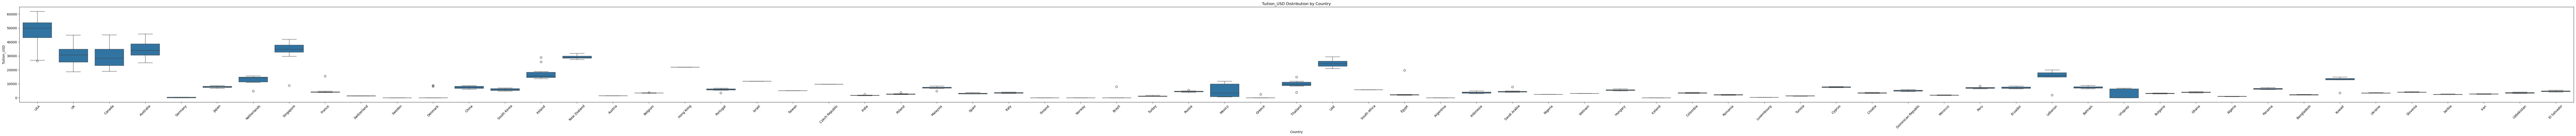

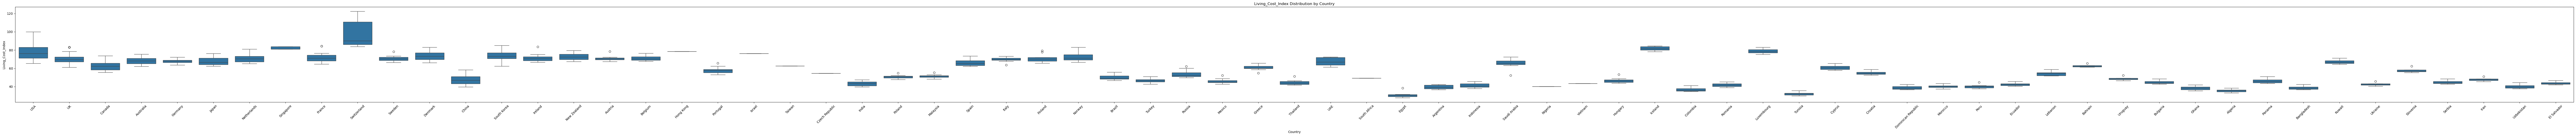

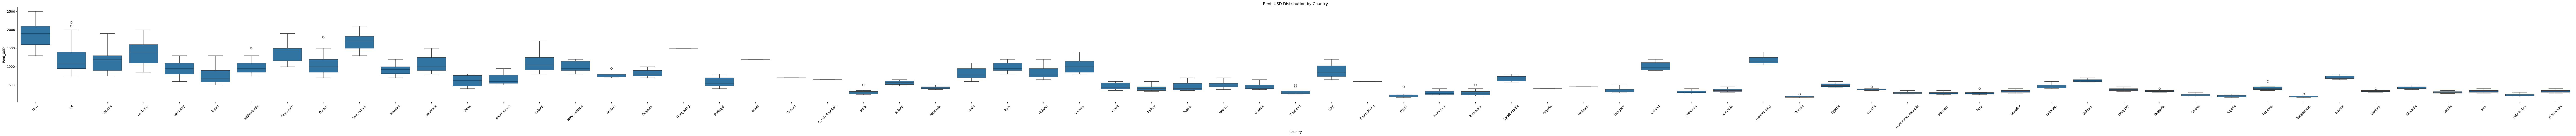

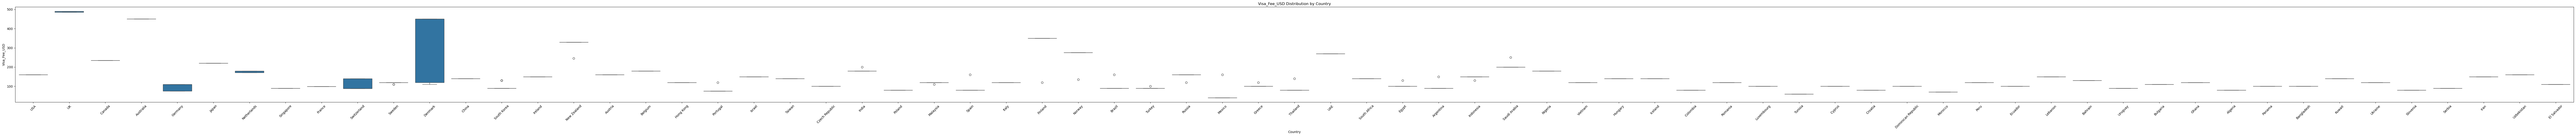

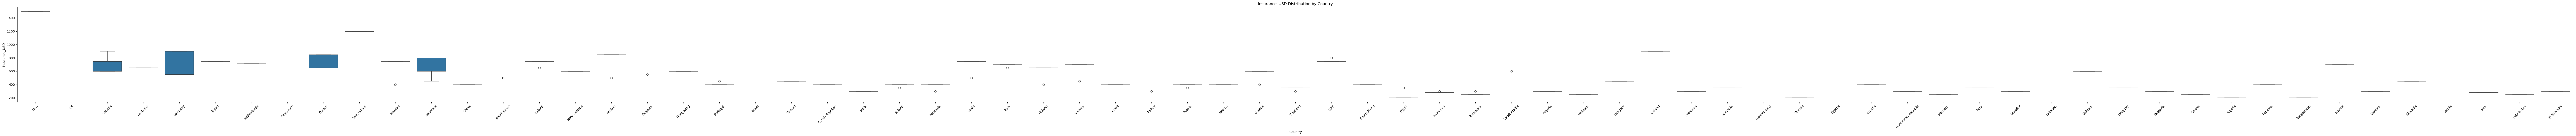

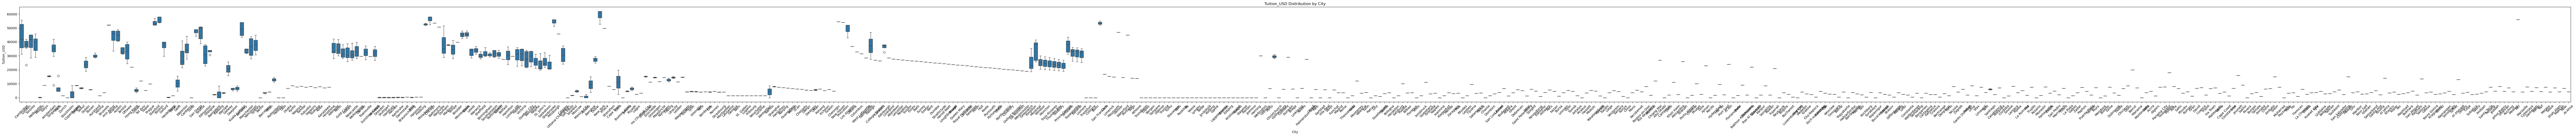

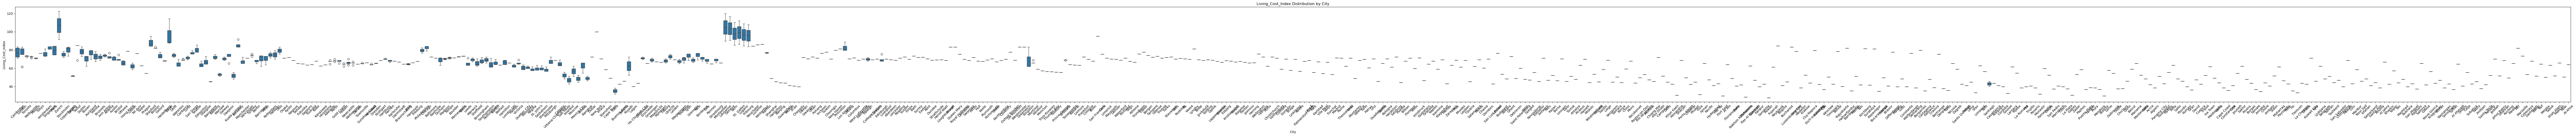

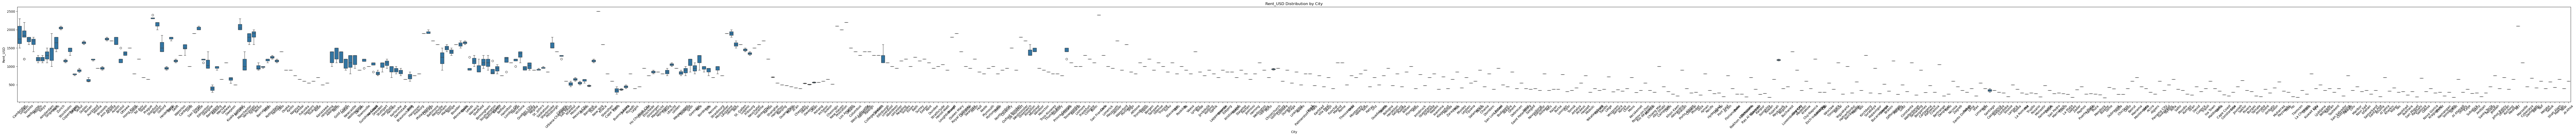

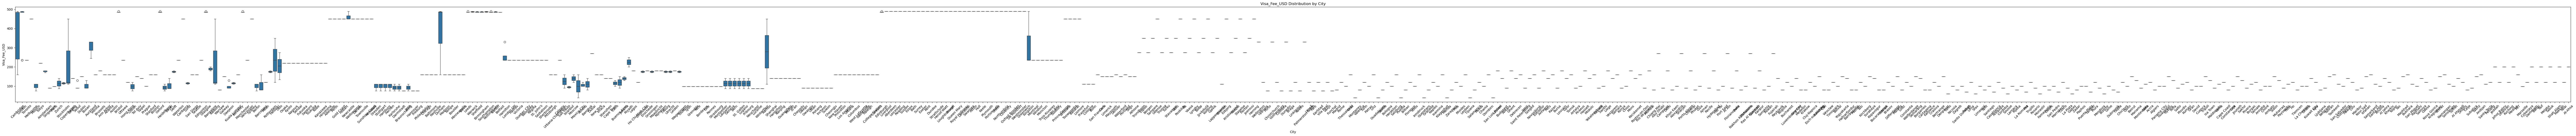

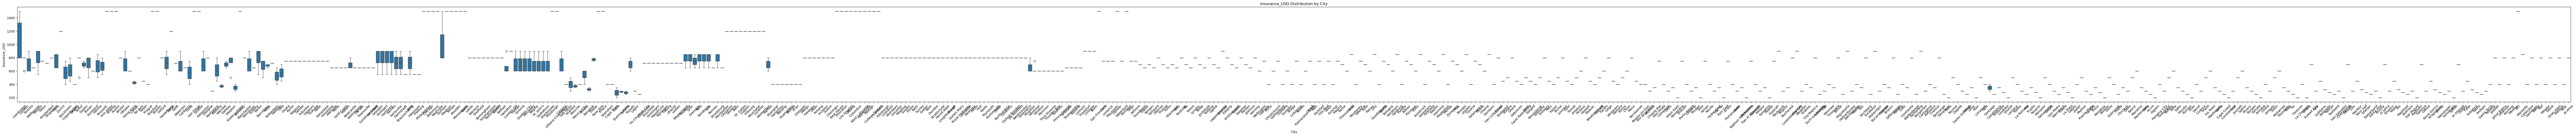

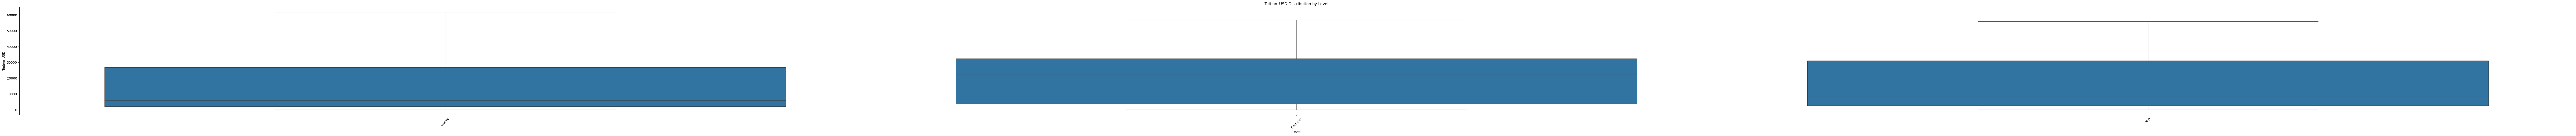

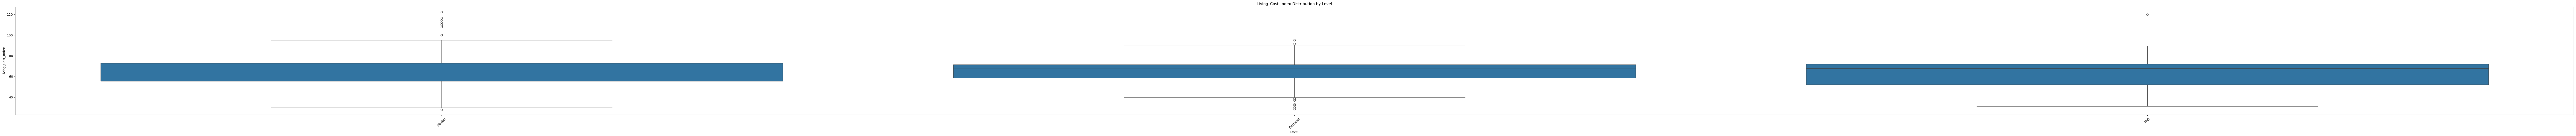

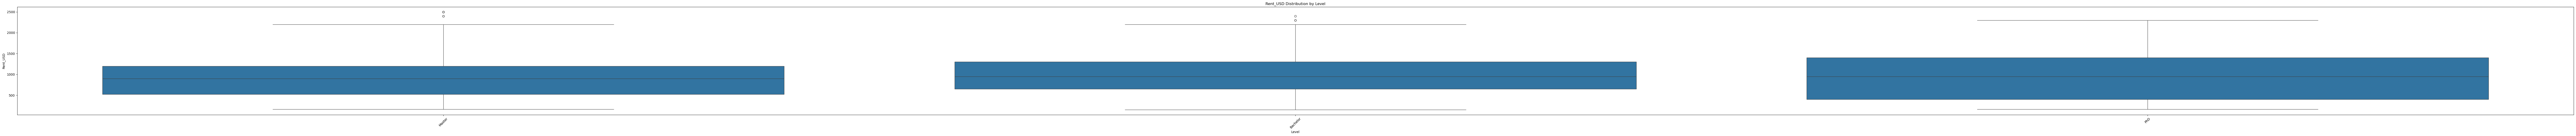

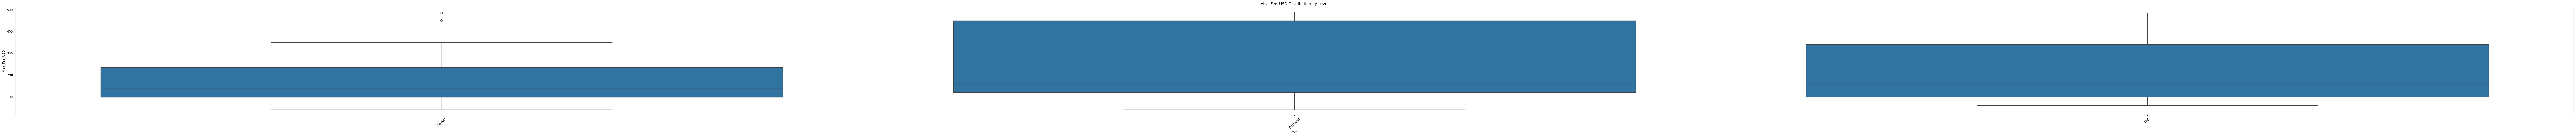

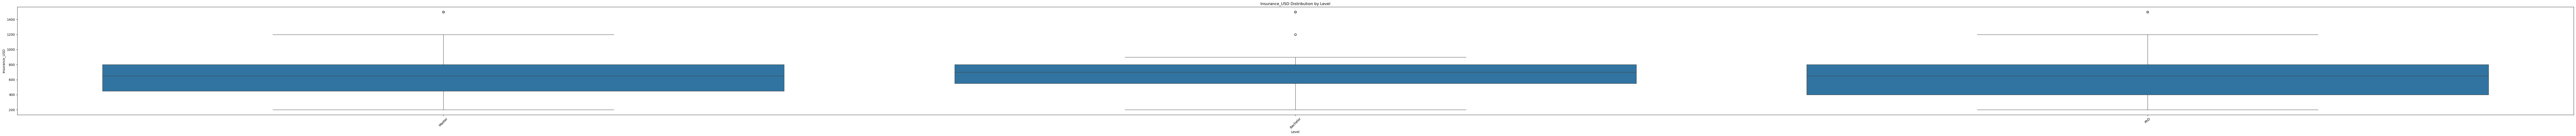

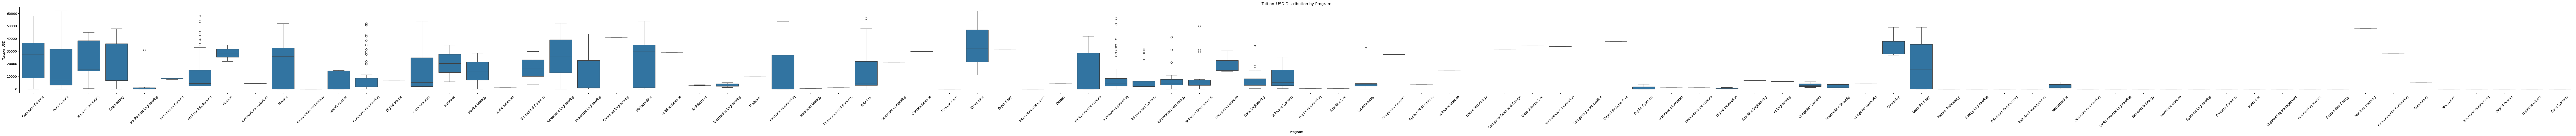

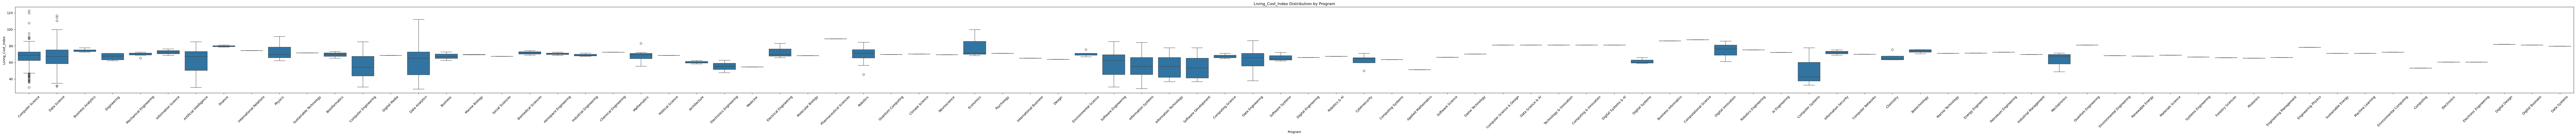

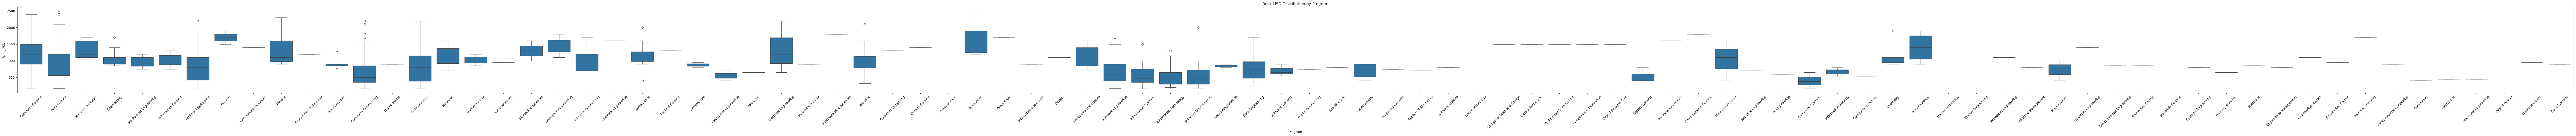

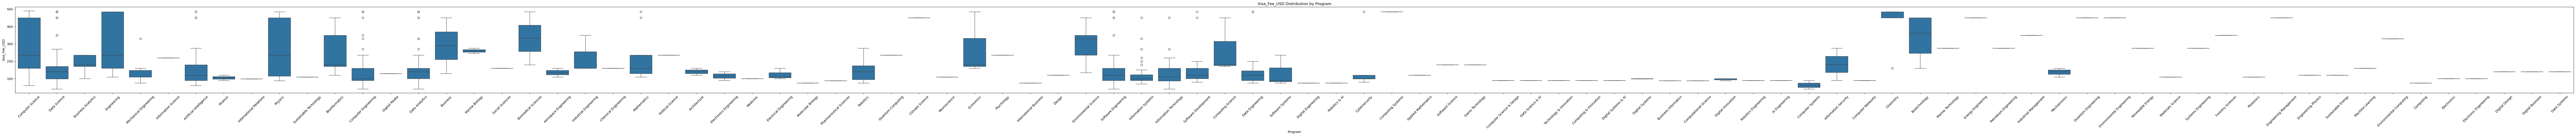

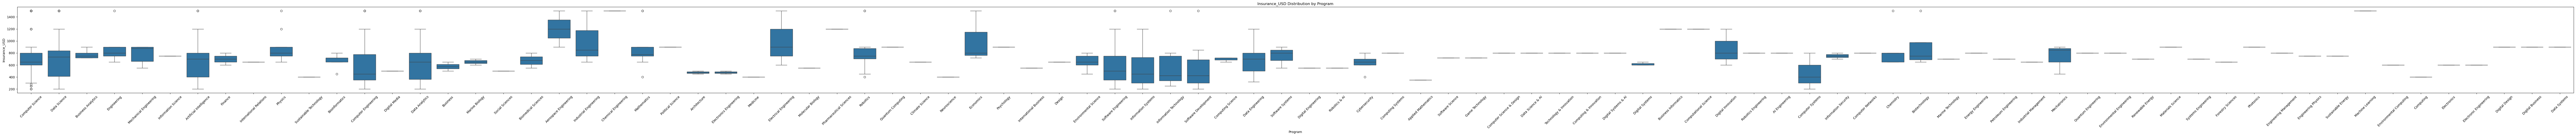

In [16]:
#Plot for Country x Tuition
categorical_var = ["Country", "City", "Level", "Program"] 
numeric_var = ["Tuition_USD", "Living_Cost_Index", "Rent_USD", "Visa_Fee_USD", "Insurance_USD"]
output_folder = "plots"
for c in categorical_var: 
    for n in numeric_var: 
        plt.figure(figsize= (112, 6))
        sns.boxplot(data = data, x = c, y = n)
        plt.xticks(rotation = 45)
        plt.title(f"{n} Distribution by {c}")
        filepath = os.path.join(output_folder, f"{n} Distribution by {c}.png")
        plt.tight_layout()
        plt.savefig(filepath, dpi = 300)
        plt.show()

### Correlation of variables

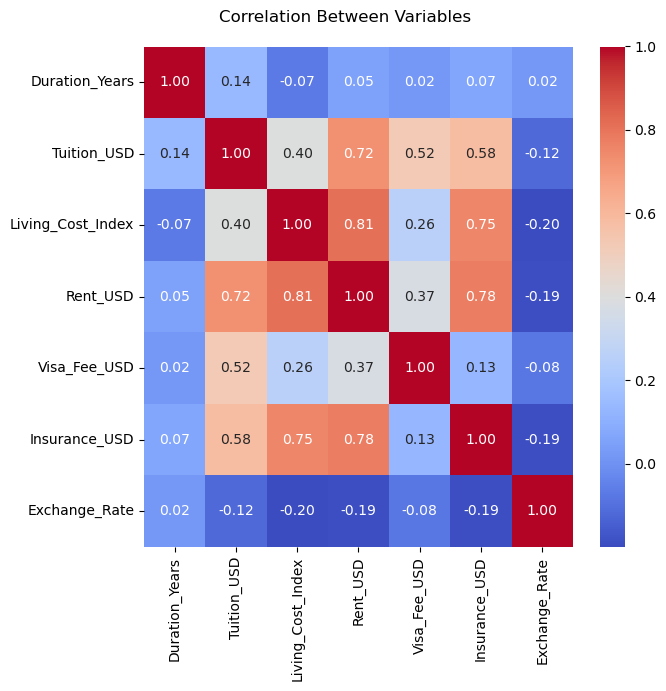

In [40]:
plt.figure(figsize = (7,7))
numeric_data = data.select_dtypes(include=["int64", "float64"]).columns
sns.heatmap(data[numeric_data].corr(), annot=True, cmap = "coolwarm", fmt = "0.2f", cbar = True,  linewidths=0)
plt.suptitle("Correlation Between Variables")
plt.tight_layout()
plt.savefig("correlation_matrix.png", dpi = 300, bbox_inches = "tight")
plt.show()


Correlation: 1-0.8 strong, 0.8-0.5 moderate, 0.5-0.3 weak, 0.3-0 no correlation
- strongly correlated values: Living_cost_index x rent (Probably to living cost index is calculated upon factors including rent)


In [44]:
data.corr

<bound method DataFrame.corr of           Country        City                      University  \
0             USA   Cambridge              Harvard University   
1              UK      London         Imperial College London   
2          Canada     Toronto           University of Toronto   
3       Australia   Melbourne         University of Melbourne   
4         Germany      Munich  Technical University of Munich   
..            ...         ...                             ...   
902        France  Strasbourg        University of Strasbourg   
903      Malaysia       Nilai                            USIM   
904  Saudi Arabia     Al-Ahsa          King Faisal University   
905           USA     Seattle        University of Washington   
906            UK  Nottingham        University of Nottingham   

                    Program     Level  Duration_Years  Tuition_USD  \
0          Computer Science    Master             2.0        55400   
1              Data Science    Master          

Visualize correlations among Tuition_USD, Living_Cost_Index, Rent_USD, and Exchange_Rate.

#### Outlier Detection

In [20]:
# IQR for outlier detection

for c in data.select_dtypes(include = "number").columns:
    
    Q1 = data[c].quantile(0.25)
    Q3 = data[c].quantile(0.75)
    IQR = Q3 -Q1
    
    # Calculate the upper bound for outlier
    upper = Q3 + 1.5 * IQR

    # Calculate the lower bound of the outlier
    lower = Q1 - 1.5 *IQR
    print(f"Outlier bounds for {c}: lower bound {lower}, upper_bound {upper}, IQR:{IQR}")



Outlier bounds for Duration_Years: lower bound -1.0, upper_bound 7.0, IQR:2.0
Outlier bounds for Tuition_USD: lower bound -39525.0, upper_bound 73475.0, IQR:28250.0
Outlier bounds for Living_Cost_Index: lower bound 32.45000000000001, upper_bound 96.04999999999998, IQR:15.899999999999991
Outlier bounds for Rent_USD: lower bound -587.5, upper_bound 2432.5, IQR:755.0
Outlier bounds for Visa_Fee_USD: lower bound -110.0, upper_bound 450.0, IQR:140.0
Outlier bounds for Insurance_USD: lower bound -75.0, upper_bound 1325.0, IQR:350.0
Outlier bounds for Exchange_Rate: lower bound -8.425, upper_bound 16.495, IQR:6.23


In [21]:
# z-score for outlier detection

from scipy.stats import zscore
z_score = data.select_dtypes(include = ["int64", "float64"]).apply(zscore)
outlier = (z_score.abs() > 3).sum()
if outlier.sum() > 0: 
    print(f"Outliers: ")
    print(outlier[outlier >0].to_string())
else: 
    print("no outlier detected")


Outliers: 
Living_Cost_Index     8
Exchange_Rate        24
